# Etape 4.2 : Visualisations Seaborn

**Livrables** :
- Ce notebook `10_visualisations_seaborn.ipynb`
- 6 figures PNG (300 dpi) dans `output/10_figures/`

---
---

## Import

In [1]:
import sys
import os
from pathlib import Path
import psutil
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## (optionnel) Enregistrement de la date de la dernière execution de ce notebook

In [2]:
print(f"- Date de la dernière execution de ce notebook : {datetime.now().strftime('%d/%m/%Y %H:%M:%S')} (FR)")

- Date de la dernière execution de ce notebook : 20/02/2026 20:33:36 (FR)


---

## (Optionnel) Mesure du temps de traitement global pour ce script - enregistrement de l'heure de début + estimation instantanée des ressources machine libres

In [3]:
## Heure de début
start_time_10 = time.time()

## Machine: current available RAM (in GB)
ram_available_10 = psutil.virtual_memory().available / (1024**3)

## Machine: current available CPU
logical = psutil.cpu_count()
physical = psutil.cpu_count(logical=False) or logical

cpu_used = psutil.cpu_percent(interval=2)
cpu_available_pct_10 = 100 - cpu_used

available_logical_10 = logical * cpu_available_pct_10 / 100
available_physical_10 = physical * cpu_available_pct_10 / 100

## Show available resources
print(f"- Current machine RAM available : {ram_available_10:.2f} GB")
print(f"- Current machine CPU available : {cpu_available_pct_10:.2f}%")
print(f"    Approx logical cores free  : {available_logical_10:.1f}")
print(f"    Approx physical cores free : {available_physical_10:.1f}")

- Current machine RAM available : 10.50 GB
- Current machine CPU available : 88.60%
    Approx logical cores free  : 14.2
    Approx physical cores free : 7.1


---

## Chemins des données

In [4]:
# ==============================================================================================================
#                                                   OUTPUTS
# ==============================================================================================================
OUT_DIR = (Path.cwd() / ".." / "output").resolve()
OUT_FIG_DIR = os.path.join(OUT_DIR, "10_figures")
os.makedirs(OUT_FIG_DIR, exist_ok=True)

# ==============================================================================================================
#                                                   INPUTS
# ==============================================================================================================
IN_DIR = (Path.cwd() / ".." / "data").resolve()
IN_CONSO_ENRICHIE_CSV =  os.path.join(OUT_DIR, "05_consommations_enrichies.csv")

# ==============================================================================================================
#                                                    OTHERS
# ==============================================================================================================
TMP_DIR = (Path.cwd() / ".." / "my_tmp").resolve()
TMP_FILE_CSV = TMP_DIR / "tmp_10_resources.txt" # Enregistrer les metrics pour ce script

---

## Chargement des données

In [5]:
df_conso = pd.read_csv(IN_CONSO_ENRICHIE_CSV)

## Affichage de quelques infos
print("df_conso :")
print(f"    - Shape: {df_conso.shape}")
print(f"    - Colonnes: {df_conso.columns.tolist()}")
print()
# Info sur les types
print("    - Infos sur les types : ")
df_conso.info()
print()
## Appercu des donnees
print("    - Appercu des donnees : ")
df_conso.head()

df_conso :
    - Shape: (991, 31)
    - Colonnes: ['batiment_id', 'heure', 'consommation_moyenne', 'unite', 'date', 'type_energie', 'ts_h', 'nom', 'type', 'commune', 'surface_m2', 'annee_construction', 'classe_energetique', 'nb_occupants_moyen', 'temperature_c', 'humidite_pct', 'rayonnement_solaire_wm2', 'vitesse_vent_kmh', 'precipitation_mm', 'jour', 'mois', 'saison', 'jour_de_semaine', 'date_debut', 'date_fin', 'tarif_unitaire', 'cout_financier', 'conso_par_occupant', 'conso_par_m2', 'IPE', 'ecart_moyenne_categorie']

    - Infos sur les types : 
<class 'pandas.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   batiment_id              991 non-null    str    
 1   heure                    991 non-null    int64  
 2   consommation_moyenne     991 non-null    float64
 3   unite                    991 non-null    str    
 4   date                  

,batiment_id,heure,consommation_moyenne,unite,date,type_energie,ts_h,nom,type,commune,...,saison,jour_de_semaine,date_debut,date_fin,tarif_unitaire,cout_financier,conso_par_occupant,conso_par_m2,IPE,ecart_moyenne_categorie
0,BAT0043,22,280.88,m3,2023-01-01,eau,2023-01-01 22:00:00,Piscine Bordeaux 43,piscine,Bordeaux,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,983.080,1.898,0.123,0.123,-401.254
1,BAT0100,17,4.52,m3,2023-01-01,eau,2023-01-01 17:00:00,Mediatheque Rennes 100,mediatheque,Rennes,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,15.820,0.037,0.005,0.005,-92.701
2,BAT0006,3,5.50,kWh,2023-01-01,gaz,2023-01-01 03:00:00,Mairie Paris 6,mairie,Paris,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,0.495,0.087,0.005,0.005,-43.286
3,BAT0126,10,126.88,kWh,2023-01-01,gaz,2023-01-01 10:00:00,Ecole Le Havre 126,ecole,Le Havre,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,11.419,0.375,0.075,0.075,7.068
4,BAT0035,20,3.97,m3,2023-01-02,eau,2023-01-02 20:00:00,Mairie Toulouse 35,mairie,Toulouse,...,NaN,NaN,2023-01-01,2023-12-31,3.50,13.895,0.046,0.005,0.005,-44.816


---

## preparation

In [6]:
sns.set_theme(style="whitegrid")

df = df_conso.copy()
df["date"] = pd.to_datetime(df["date"])
if "ts_h" not in df.columns:
    df["ts_h"] = df["date"] + pd.to_timedelta(df["heure"].astype(int), unit="h")

# --- Table wide: une ligne = batiment_id + ts_h, conso par énergie en colonnes ---
wide = (
    df.pivot_table(
        index=["batiment_id", "ts_h", "saison", "type", "commune",
               "surface_m2", "nb_occupants_moyen", "annee_construction", "classe_energetique"],
        columns="type_energie",
        values="consommation_moyenne",
        aggfunc="mean"
    )
    .reset_index()
)

# Harmoniser les noms attendus (si colonnes absentes, elles n'apparaîtront pas)
# ex: wide["electricite"], wide["gaz"], wide["eau"]

# --- Table mensuelle par commune ---
df["mois"] = df["date"].dt.to_period("M").dt.to_timestamp()
monthly_commune = (
    df.groupby(["commune", "mois"])["consommation_moyenne"]
      .sum()
      .reset_index()
)

# Top 6 communes
top_communes = (
    monthly_commune.groupby("commune")["consommation_moyenne"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)
monthly_top6 = monthly_commune[monthly_commune["commune"].isin(top_communes)].copy()


---

## Pairplot des consommations (electricite, gaz, eau) par saison

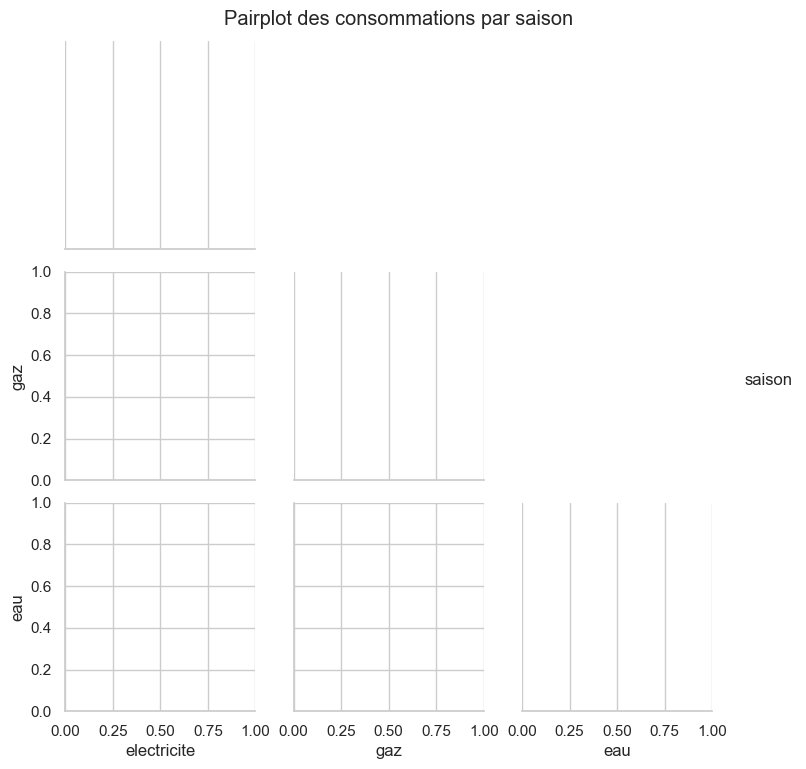

In [7]:
cols = [c for c in ["electricite", "gaz", "eau"] if c in wide.columns]
pp = sns.pairplot(
    wide.dropna(subset=cols),
    vars=cols,
    hue="saison",
    corner=True,
    plot_kws={"alpha": 0.35, "s": 15}
)
pp.figure.suptitle("Pairplot des consommations par saison", y=1.02)
pp.figure.savefig(f"{OUT_FIG_DIR}/01_pairplot_conso_par_saison.png", dpi=300, bbox_inches="tight")
plt.show(pp.figure)
plt.close(pp.figure)


---

## Violin plot de la consommation electrique par type de batiment

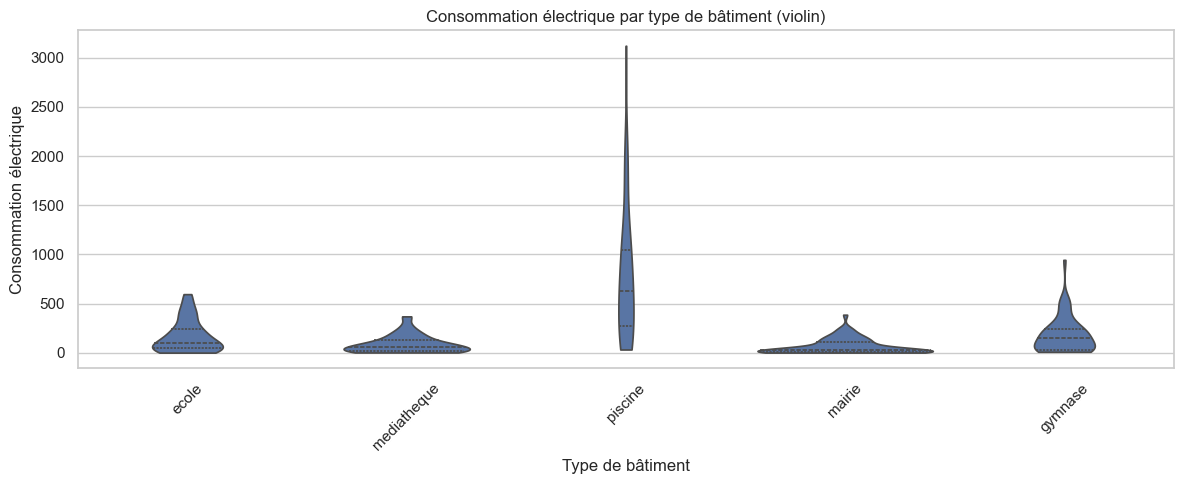

In [8]:
if "electricite" in wide.columns:
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.violinplot(data=wide, x="type", y="electricite", ax=ax, inner="quartile", cut=0)
    ax.set_title("Consommation électrique par type de bâtiment (violin)")
    ax.set_xlabel("Type de bâtiment")
    ax.set_ylabel("Consommation électrique")
    ax.tick_params(axis="x", rotation=45)
    fig.tight_layout()
    fig.savefig(f"{OUT_FIG_DIR}/02_violin_electricite_par_type_batiment.png", dpi=300, bbox_inches="tight")
    plt.show(fig)
    plt.close(fig)
else:
    print("⚠️ Colonne 'electricite' absente du pivot wide -> violin plot non généré.")


---

## Heatmap annotee de la matrice de correlation complete

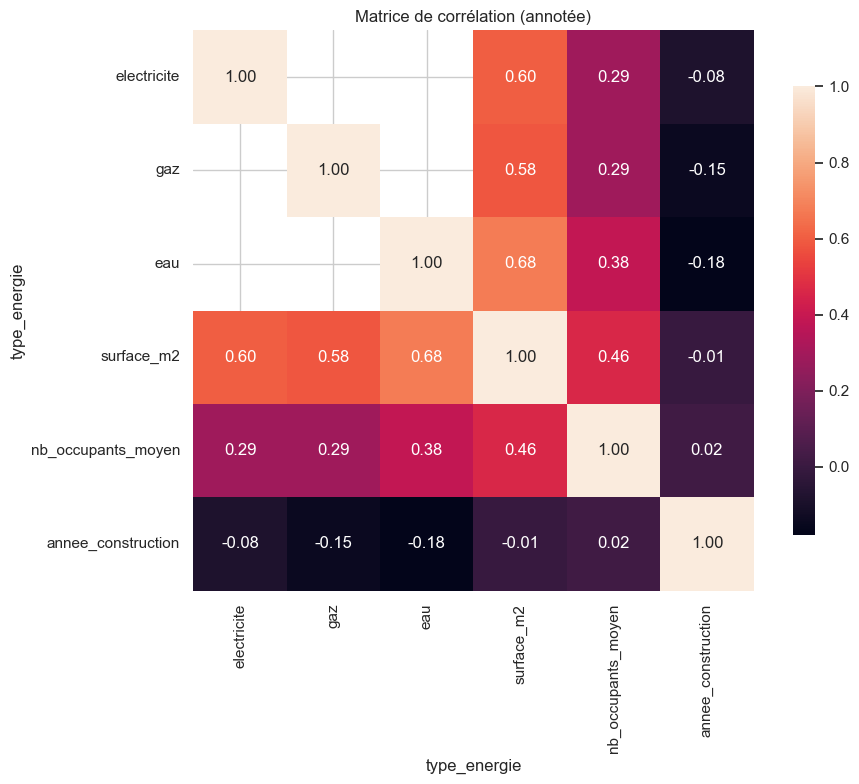

In [9]:
corr_cols = [c for c in [
    "electricite", "gaz", "eau",
    "temperature_c", "humidite_pct", "rayonnement_solaire_wm2", "vitesse_vent_kmh",
    "surface_m2", "nb_occupants_moyen", "annee_construction"
] if c in wide.columns or c in df.columns]

# Pour inclure météo si elle est dans df (pas dans wide), on la récupère par ts_h/commune si besoin.
# Ici on fait simple: on prend wide et on ajoute météo si elle y est déjà (sinon ignore).
corr_df = wide[[c for c in corr_cols if c in wide.columns]].copy()

corr = corr_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
ax.set_title("Matrice de corrélation (annotée)")
fig.tight_layout()
fig.savefig(f"{OUT_FIG_DIR}/03_heatmap_correlation_complete.png", dpi=300, bbox_inches="tight")
plt.show(fig)
plt.close(fig)


---

## FacetGrid : evolution mensuelle par commune (top 6 communes)

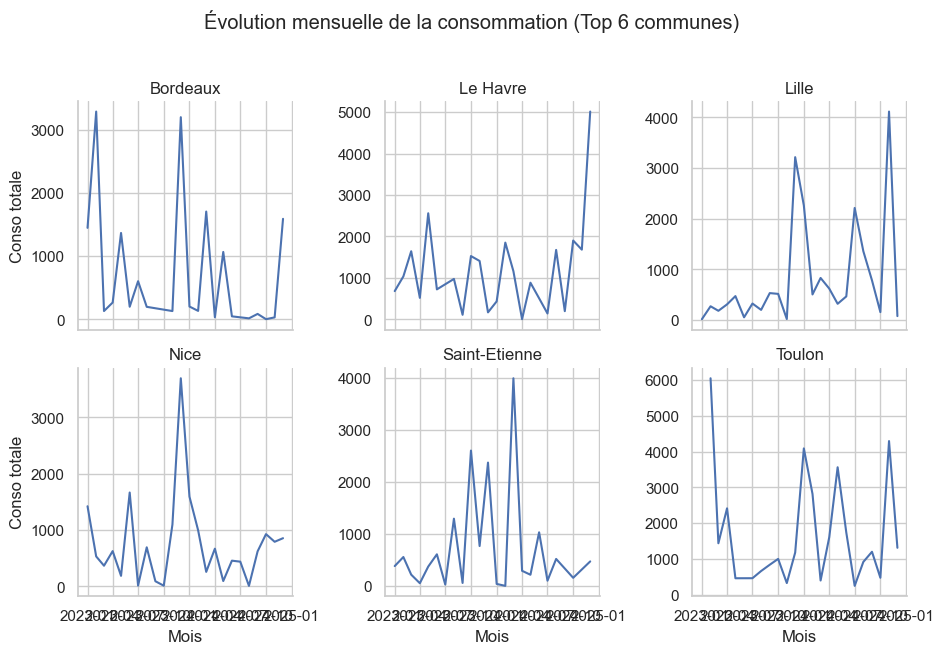

In [10]:
g = sns.FacetGrid(monthly_top6, col="commune", col_wrap=3, height=3.2, sharey=False)
g.map_dataframe(sns.lineplot, x="mois", y="consommation_moyenne")
g.set_axis_labels("Mois", "Conso totale")
g.set_titles("{col_name}")
g.figure.suptitle("Évolution mensuelle de la consommation (Top 6 communes)", y=1.02)
g.figure.tight_layout()
g.figure.savefig(f"{OUT_FIG_DIR}/04_facetgrid_evolution_mensuelle_top6_communes.png", dpi=300, bbox_inches="tight")
plt.show(g.figure)
plt.close(g.figure)


---

## Jointplot : relation surface vs consommation avec distributions marginales

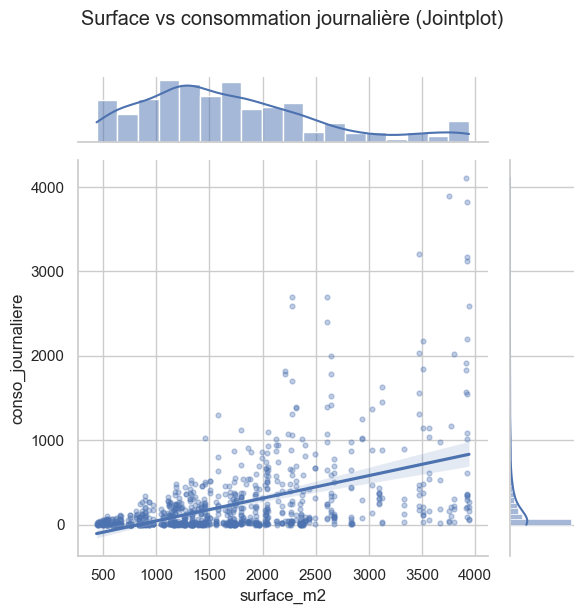

In [11]:
daily_bat = (
    df.groupby(["batiment_id", "nom", "type", "commune", "surface_m2", "date"])["consommation_moyenne"]
      .sum()
      .reset_index()
      .rename(columns={"consommation_moyenne": "conso_journaliere"})
)

jp = sns.jointplot(
    data=daily_bat.dropna(subset=["surface_m2", "conso_journaliere"]),
    x="surface_m2", y="conso_journaliere",
    kind="reg",
    scatter_kws={"alpha": 0.35, "s": 12}
)
jp.figure.suptitle("Surface vs consommation journalière (Jointplot)", y=1.02)
jp.figure.tight_layout()
jp.figure.savefig(f"{OUT_FIG_DIR}/05_jointplot_surface_vs_conso.png", dpi=300, bbox_inches="tight")
plt.show(jp.figure)
plt.close(jp.figure)


---

## Catplot : consommation par classe energetique et type de batiment

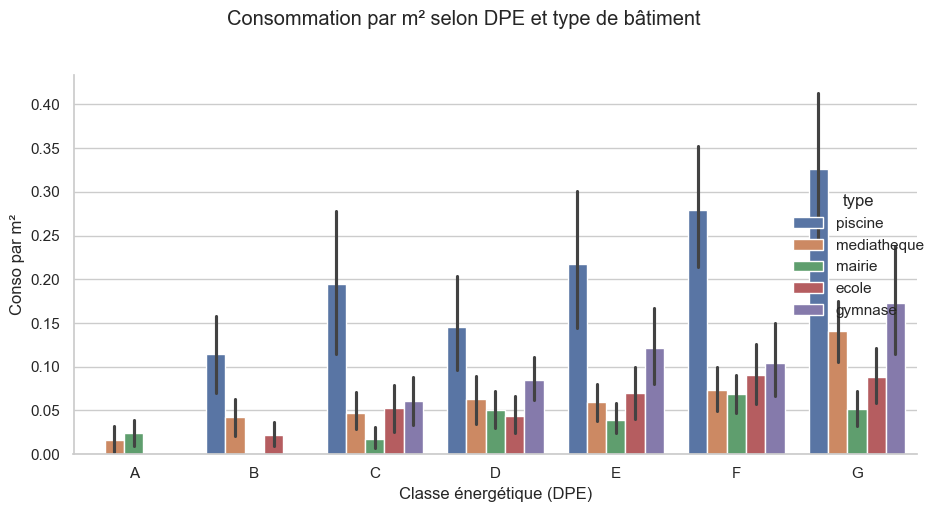

In [12]:
if "conso_par_m2" not in df.columns and "surface_m2" in df.columns:
    df["conso_par_m2"] = df["consommation_moyenne"] / df["surface_m2"]

order_dpe = ["A","B","C","D","E","F","G"]

cp = sns.catplot(
    data=df.dropna(subset=["classe_energetique", "type", "conso_par_m2"]),
    x="classe_energetique", y="conso_par_m2",
    hue="type",
    kind="bar",
    order=order_dpe,
    height=5, aspect=1.6
)
cp.figure.suptitle("Consommation par m² selon DPE et type de bâtiment", y=1.02)
cp.set_axis_labels("Classe énergétique (DPE)", "Conso par m²")
cp.figure.tight_layout()
cp.figure.savefig(f"{OUT_FIG_DIR}/06_catplot_conso_par_dpe_et_type.png", dpi=300, bbox_inches="tight")
plt.show(cp.figure)
plt.close(cp.figure)


---

## Libérer la mémoire (Optionnel) 

In [13]:
del df_conso
del df

---

## (Optionnel) enregistrement dans un fichier temporaire du temps d'execution + ressources pour utilisation ultérieure (dans le script run_pipeline_hybride.py ou autres)

In [14]:
temps_execution_10 = time.time() - start_time_10
temps_resources = f"""
    Date : {datetime.now().strftime("%d/%m/%Y %H:%M:%S")} (FR)

    temps_exec_sec={temps_execution_10:.2f}
    ram_gb={ram_available_10:.2f}
    cpu_pct={cpu_available_pct_10:.2f}
    logi_cores={available_logical_10:.1f}
    physi_cores={available_physical_10:.1f}
"""

# Ecrire des données du temps d'execution + ressources dans le fichier TMP_FILE_CSV
TMP_FILE_CSV.write_text(temps_resources, encoding="utf-8")

137